We are going to try and build  classifier for ditinguishing between cheetah jaguar and a leopard.

We will not be using the microsoft azure image search API.
We will use what we used previously, to manualy download using javascript

In [1]:
#!pip install fastai --upgrade

In [2]:
root_dir = '/content/'

In [3]:
!pip install fastbook

In [4]:
import fastbook
fastbook.setup_book()

In [5]:
from fastbook import *
from fastai.vision.widgets import *

In [6]:
!cat {path/file_name}

cat: {path/file_name}: No such file or directory


In [10]:
path = Path(root_dir + '/animals')
classes = ['cheetah', 'jaguar', 'leopard']
for folder in classes:
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  file_name = str(folder) + ".txt"
  print(file_name, path/file_name, dest)
  download_images(url_file=path/file_name, dest=dest ,max_pics=200 )

  # if you get a file not found error then it helps to actually add the variable name

cheetah.txt /content/animals/cheetah.txt /content/animals/cheetah


jaguar.txt /content/animals/jaguar.txt /content/animals/jaguar


leopard.txt /content/animals/leopard.txt /content/animals/leopard


In [11]:
path.ls()

(#7) [Path('/content/animals/cheetah'),Path('/content/animals/leopard.txt'),Path('/content/animals/jaguar.txt'),Path('/content/animals/.ipynb_checkpoints'),Path('/content/animals/cheetah.txt'),Path('/content/animals/leopard'),Path('/content/animals/jaguar')]

In [12]:
fns = get_image_files(path)
  

In [13]:
fns

(#483) [Path('/content/animals/cheetah/00000058.jpg'),Path('/content/animals/cheetah/00000127.jpg'),Path('/content/animals/cheetah/00000032.jpg'),Path('/content/animals/cheetah/00000158.jpg'),Path('/content/animals/cheetah/00000131.jpg'),Path('/content/animals/cheetah/00000063.jpg'),Path('/content/animals/cheetah/00000038.jpg'),Path('/content/animals/cheetah/00000015.jpg'),Path('/content/animals/cheetah/00000132.jpg'),Path('/content/animals/cheetah/00000137.jpg')...]

In [14]:
failed = verify_images(fns)

In [15]:
# to remove all failed images
failed.map(Path.unlink)

(#0) []

In [16]:
??get_image_files

# for getting help

In [17]:
animals = DataBlock(
    blocks = (ImageBlock, CategoryBlock), # independent and dependent blocks
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    # parent_label is a function provided by fastai 
    # that simply gets the name of the folder a file is in.
    item_tfms = Resize(128)
)

In [18]:
dls =animals.dataloaders(path)
# DataLoader is a class that provides batches of a few items at a time to the GPU.


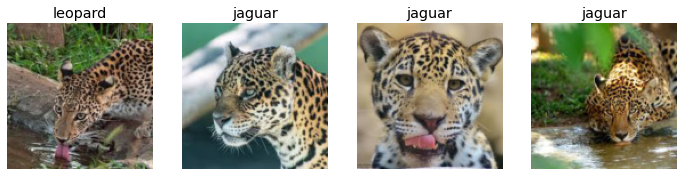

In [19]:
dls.valid.show_batch(max_n=4, nrows=1)

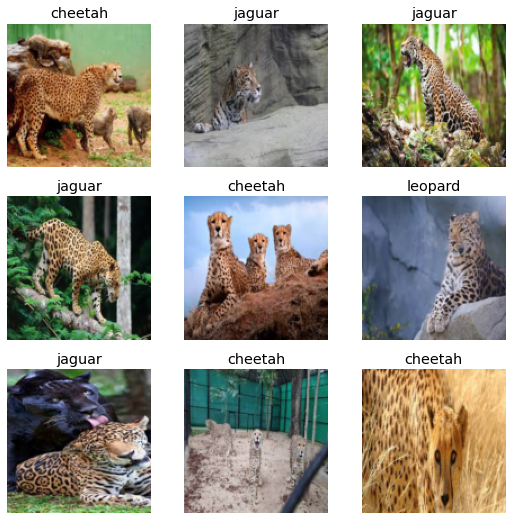

In [21]:
animals = animals.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = animals.dataloaders(path)
dls.show_batch()

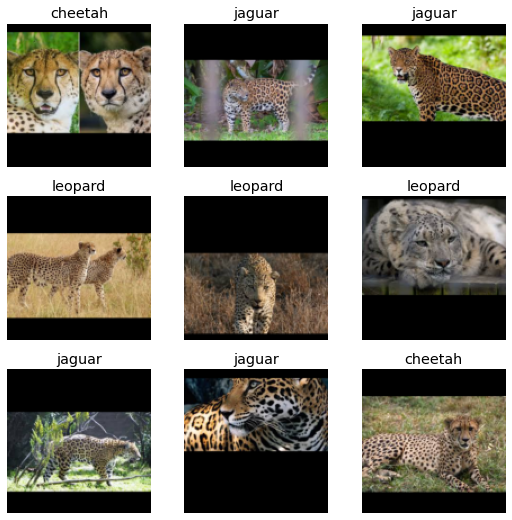

In [23]:
animals = animals.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = animals.dataloaders(path)
dls.show_batch()

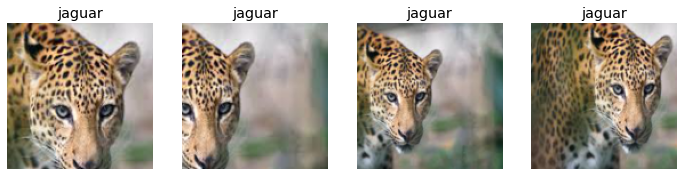

In [24]:
animals = animals.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = animals.dataloaders(path)
dls.show_batch(max_n=4, nrows=1, unique=True)

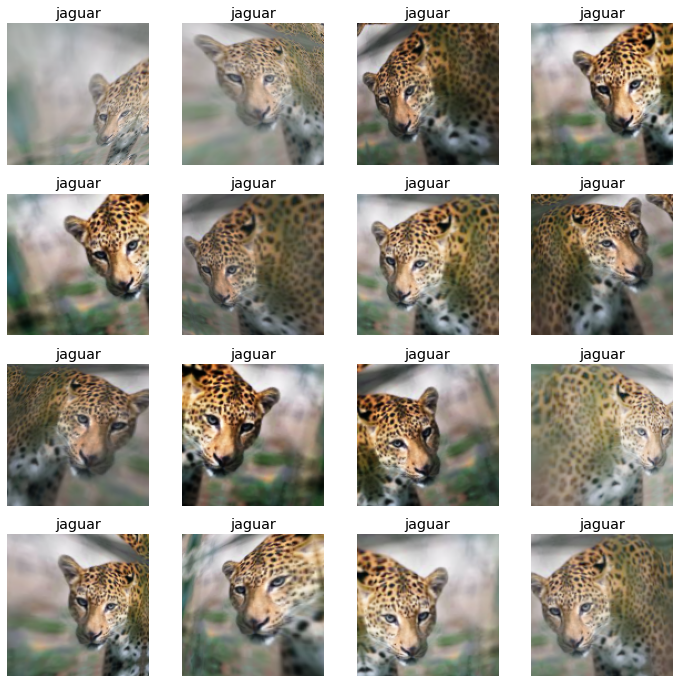

In [26]:
animals = animals.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = animals.dataloaders(path)
dls.show_batch(max_n=16, nrows=4, unique=True)

In [27]:
animals = animals.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = animals.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#next ImageGUICleaner